In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from sklearn.mixture import BayesianGaussianMixture

In [2]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True)

In [11]:
class BayesClassifier:   
    def fit(self, X, Y):
        self.K = len(set(Y.astype(np.int32)))
        
        self.gaussians = []
        for k in range(self.K):
            print("fitting gmm", k)
            Xk = X[Y==k]
            gmm = BayesianGaussianMixture(10)
            gmm.fit(Xk)
            self.gaussians.append(gmm)
    
    def sample_given_y(self, y):
        gmm = self.gaussians[y]
        sample = gmm.sample()
        
        mean = gmm.means_[sample[1]]
        return sample[0].reshape(28,28), mean.reshape(28, 28)
    
    def sample(self):
        y = np.random.randint(self.K)
        return self.sample_given_y(y)

In [12]:
X = X.astype(np.int32)
y = y.astype(np.int32)

In [13]:
bc = BayesClassifier()
bc.fit(X, y)
result = bc.sample()

fitting gmm 0
fitting gmm 1
fitting gmm 2
fitting gmm 3
fitting gmm 4
fitting gmm 5
fitting gmm 6
fitting gmm 7
fitting gmm 8
fitting gmm 9


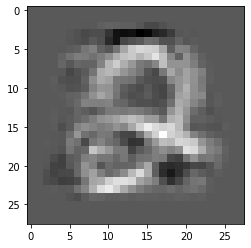

In [14]:
plt.imshow(result[0], cmap="gray")

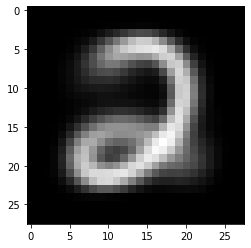

In [15]:
plt.imshow(result[1], cmap="gray")

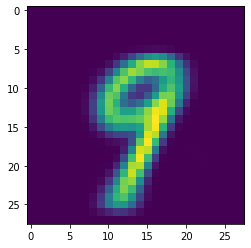

In [17]:
plt.imshow(bc.sample()[1])